In [1]:
from __init__ import get_base_path
from dotenv import load_dotenv
from geopy.distance import geodesic
from matplotlib import pyplot as plt
import csv
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

# environment
load_dotenv(get_base_path() + '/airbnb.env')
data_dir = get_base_path() + os.getenv('data_dir')

# Load Airbnb data
path = data_dir + 'processed/' + 'airbnb_sample' + '.csv'
airbnb_data = pd.read_csv(path,index_col=0)

# Load Landmarks data
path = data_dir + 'processed/' + 'NYC_famous_landmarks_list' + '.csv'
landmarks_data = pd.read_csv(path,index_col=0)


/Users/kmazurczyk/Desktop/python/AirBnB-Price-Predictor/Downloads/airbnb_pricepredictor-main/Downloads/AirBnB-Price-Predictor-main/AirBnB-Price-Predictor/airbnbenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
airbnb_data['borough'] = airbnb_data.filter(like='neighbourhood_group_cleansed_').idxmax(axis=1).str.replace('neighbourhood_group_cleansed_', '')
airbnb_lat_long = airbnb_data.loc[:,['id','latitude','longitude','borough','price']].copy()
airbnb_lat_long

,id,latitude,longitude,borough,price
7347,42273545,40.660070,-73.953720,Brooklyn,70.0
15309,1148821271649296263,40.766013,-73.987527,Manhattan,450.0
23466,886759118206964183,40.754659,-73.972129,Manhattan,455.0
185769,713666857948299920,40.762940,-73.958950,Manhattan,214.0
32391,13386091,40.614280,-74.006180,Brooklyn,175.0
...,...,...,...,...,...
24093,13170159,40.580190,-73.954200,Brooklyn,140.0
29082,24021046,40.586002,-73.813883,Queens,65.0
1445,14672524,40.799810,-73.948040,Manhattan,105.0
259246,812492800852380445,40.751067,-73.984676,Manhattan,225.0


In [3]:
landmarks_data['landmark'] = landmarks_data['landmark'].str.replace(' ','_').str.lower()
landmarks_data.head()

,landmark,latitude,longitude
0,apollo_theater,40.810018,-73.950056
1,brooklyn_bridge,40.706086,-73.996864
2,brooklyn_museum,40.671206,-73.963631
3,carnegie_hall,40.765126,-73.979924
4,central_park_zoo,40.767706,-73.971991


# Haversine Distances EDA

* min distance landmark
* mean/median distance from landmarks
* n landmarks in 500m (walking distance)

In [4]:
for index, row in landmarks_data.iterrows():
    airbnb_lat_long[row['landmark']+'_dist'] = airbnb_lat_long[['latitude','longitude']].apply(lambda property: geodesic(
                (property['latitude'], property['longitude']),
                (row['latitude'], row['longitude'])
            ).meters, axis=1)

airbnb_lat_long

,id,latitude,longitude,borough,price,apollo_theater_dist,brooklyn_bridge_dist,brooklyn_museum_dist,carnegie_hall_dist,central_park_zoo_dist,...,new_york_botanical_garden_dist,new_york_public_library_main_branch_dist,radio_city_music_hall_dist,rockefeller_center_dist,saint_patrick's_cathedral_dist,statue_of_liberty_dist,times_square_dist,wall_street_dist,whitney_museum_dist,yankee_stadium_dist
7347,42273545,40.660070,-73.953720,Brooklyn,70.0,16654.420091,6278.054009,1493.850241,11874.535601,12052.102859,...,23362.574625,10617.389579,11314.090432,11158.215989,11106.481134,8331.215024,11199.781260,6909.667925,9984.675061,18974.030872
15309,1148821271649296263,40.766013,-73.987527,Manhattan,450.0,5820.909902,6701.435527,10719.976441,649.448640,1325.123472,...,14164.884857,1492.770794,925.059564,1100.463254,1261.313190,9789.450926,908.208082,6900.168743,3443.513464,8759.977718
23466,886759118206964183,40.754659,-73.972129,Manhattan,455.0,6423.761109,5784.600809,9295.080954,1335.720732,1448.918721,...,14378.813286,870.521380,887.569215,714.688280,557.269092,9494.578164,1191.005262,6227.092106,3525.011991,9185.900824
185769,713666857948299920,40.762940,-73.958950,Manhattan,214.0,5281.625124,7079.482057,10194.569618,1787.453823,1221.659810,...,13002.528130,2246.407084,1805.742270,1729.502871,1533.446889,10917.981731,2312.162918,7595.739371,4949.008413,7906.922379
32391,13386091,40.614280,-74.006180,Brooklyn,175.0,22247.727789,10225.149578,7274.278131,16897.500748,17281.008070,...,29611.391019,15556.845577,16330.142576,16209.629523,16226.909709,8933.759736,16052.066964,10190.548141,13916.976512,24852.590295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24093,13170159,40.580190,-73.954200,Brooklyn,140.0,25524.347519,14438.600581,10138.494310,20651.520574,20877.470952,...,31991.510672,19356.260224,20083.409830,19935.250546,19900.381986,14318.760396,19919.628320,14717.757750,18294.347069,27802.327463
29082,24021046,40.586002,-73.813883,Queens,65.0,27409.835174,20429.464028,15812.582224,24346.044165,24203.788710,...,31146.713126,23395.087705,23884.063259,23708.328421,23574.196933,22628.498575,23986.547880,21201.964484,23722.027721,28671.656850
1445,14672524,40.799810,-73.948040,Manhattan,105.0,1146.293106,11194.965891,14341.889975,4698.790694,4098.445428,...,9145.829515,5929.042928,5180.349216,5242.887807,5155.582120,14734.771555,5621.899522,11610.986078,8431.733332,3791.928870
259246,812492800852380445,40.751067,-73.984676,Manhattan,225.0,7169.168628,5100.153340,9044.958827,1611.972085,2135.794018,...,15313.216090,311.509437,1065.944351,991.469898,1102.208198,8524.867380,770.576413,5401.826712,2407.893785,10025.949855


# Engineer Features

In [5]:
# prepare masks to compute log distances and summarizing features
dist_cols = airbnb_lat_long.filter(regex='_dist$').columns.to_list()
landmarks = [col.replace('_dist','') for col in dist_cols]
log_dist_cols = [col.replace('_dist','_log_dist') for col in dist_cols]

In [6]:
# log distances to control skew
for col in landmarks:
    airbnb_lat_long[col+"_log_dist"] = np.log(airbnb_lat_long[col+"_dist"])

In [7]:
# summary features
airbnb_lat_long['mean_dist_landmarks'] = airbnb_lat_long.filter(dist_cols).mean(axis=1)
airbnb_lat_long['median_dist_landmarks'] = airbnb_lat_long.filter(dist_cols).median(axis=1)
airbnb_lat_long['num_landmarks_dist_500m'] = airbnb_lat_long.filter(dist_cols).map(lambda x: 1 if x <= 500 else 0).sum(axis=1)
airbnb_lat_long['closest_landmark'] = airbnb_lat_long.filter(dist_cols).idxmin(axis=1).str.replace("_dist","")
airbnb_lat_long['mean_log_dist_landmarks'] = airbnb_lat_long.filter(log_dist_cols).mean(axis=1)
airbnb_lat_long['median_log_dist_landmarks'] = airbnb_lat_long.filter(log_dist_cols).median(axis=1)

# Save to CSVs

In [8]:
#  airbnb landmark relationships full detail
path = data_dir + 'processed/' 
airbnb_lat_long.to_csv(path + 'airbnb_sample_landmark_detail.csv')

In [9]:
# append summary features back to airbnb dataset
new_features = airbnb_lat_long.drop(['latitude','longitude','borough','price'],axis=1)
airbnb_data = airbnb_data.join(new_features.set_index('id'),on='id')
airbnb_data.to_csv(path + 'airbnb_cleansed_sample_with_landmark_features.csv')

# EDA

In [10]:
summary_columns = airbnb_lat_long.filter(regex="^(mean)|(median)|(num)").columns.to_list()
summary_columns

['mean_dist_landmarks',
 'median_dist_landmarks',
 'num_landmarks_dist_500m',
 'mean_log_dist_landmarks',
 'median_log_dist_landmarks']

In [11]:
def plot_distributions(df, columns, title=''):
    index = len(columns)

    fig, axs = plt.subplots(1,index)
    fig.set_size_inches(index*6,index*3)

    for i in range(index):
        sns.histplot(df, x=columns[i], hue='borough', multiple='stack', ax=axs[i])
        axs[i].get_legend().set_visible(False)

    axs[index-1].get_legend().set_visible(True)
    fig.suptitle(title)
    plt.tight_layout()

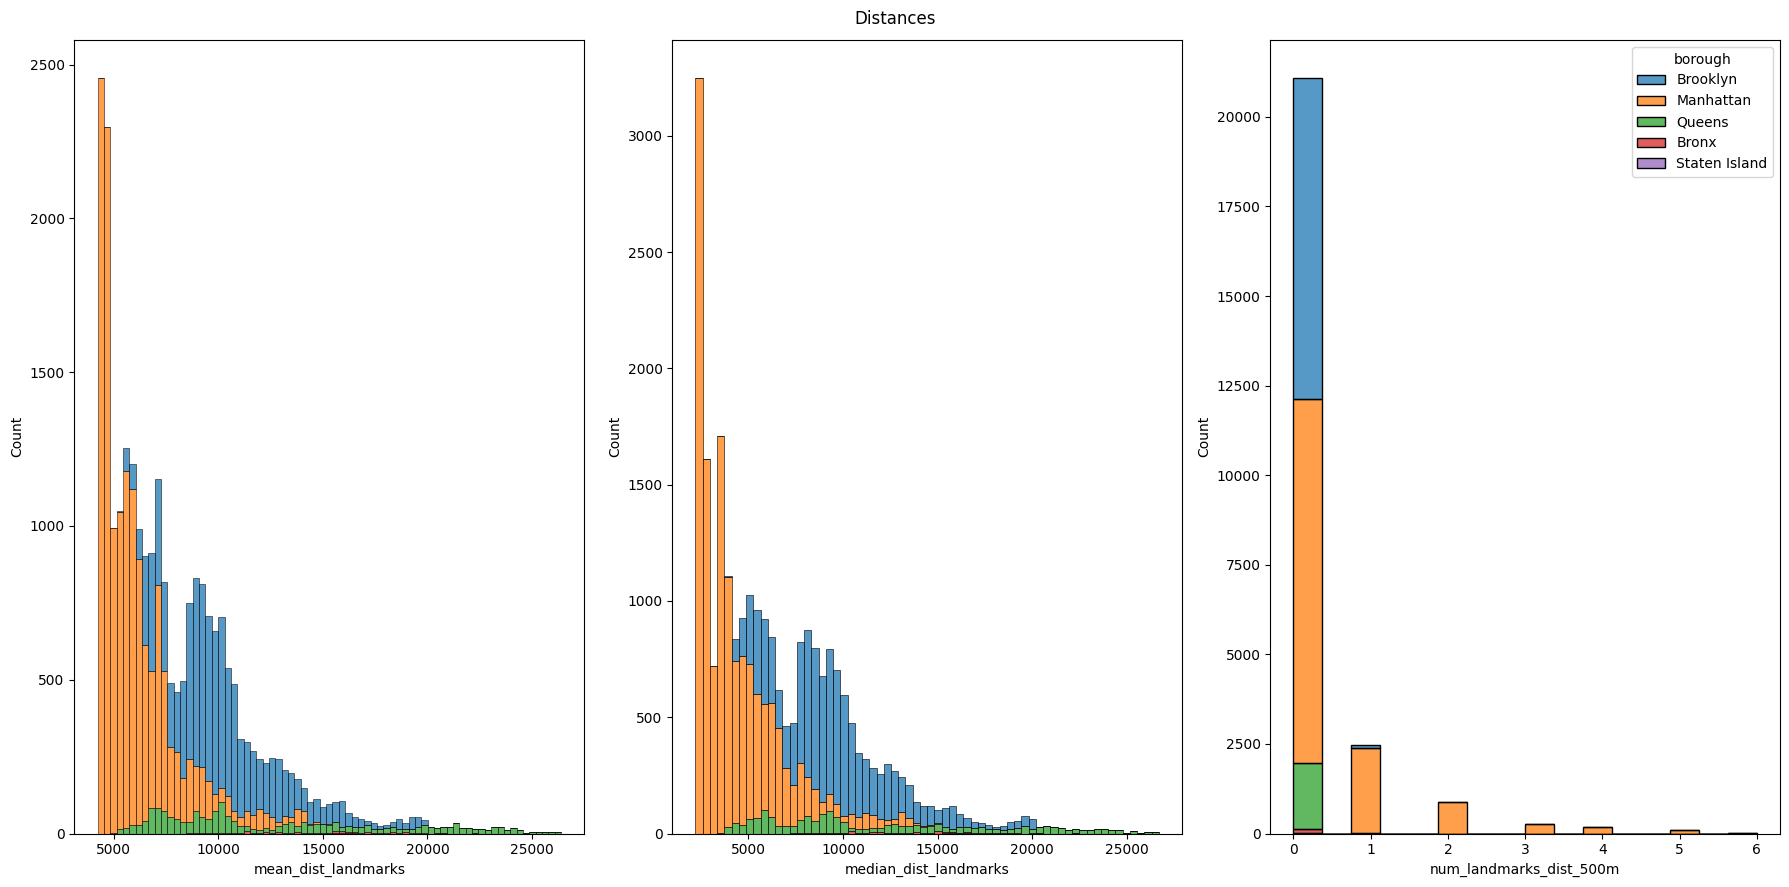

In [12]:
%matplotlib inline

plot_distributions(airbnb_lat_long,['mean_dist_landmarks', 'median_dist_landmarks', 'num_landmarks_dist_500m'],"Distances")


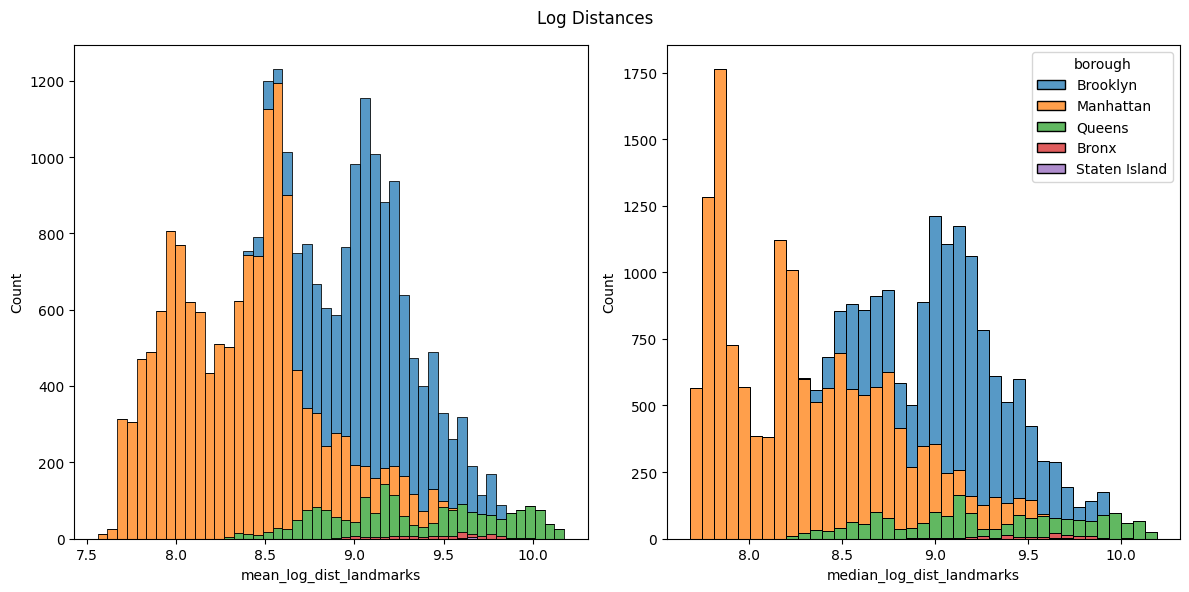

In [13]:
%matplotlib inline

plot_distributions(airbnb_lat_long,['mean_log_dist_landmarks','median_log_dist_landmarks'],"Log Distances")


In [14]:
# correlation
def calc_correlation(df,columns_list,target_column,return_list=False):
    df_corr = df[columns_list+[target_column]].corr().round(2).T
    if return_list is True:
        return df_corr[target_column].sort_values(ascending=False)[1:]
    else:
        return df_corr


In [15]:
# correlation of engineered features
calc_correlation(airbnb_lat_long,summary_columns,'price',True)

num_landmarks_dist_500m      0.10
mean_dist_landmarks         -0.15
median_dist_landmarks       -0.15
median_log_dist_landmarks   -0.17
mean_log_dist_landmarks     -0.18
Name: price, dtype: float64

In [16]:
# correlation of log distances to specific landmarks
calc_correlation(airbnb_lat_long,log_dist_cols,'price',True)

coney_island_log_dist                           0.06
brooklyn_museum_log_dist                        0.05
new_york_botanical_garden_log_dist             -0.00
yankee_stadium_log_dist                        -0.01
apollo_theater_log_dist                        -0.02
columbia_university_log_dist                   -0.04
guggenheim_museum_log_dist                     -0.09
statue_of_liberty_log_dist                     -0.10
brooklyn_bridge_log_dist                       -0.11
metropolitan_museum_of_art_log_dist            -0.11
charging_bull_log_dist                         -0.12
wall_street_log_dist                           -0.12
moma_ps1_log_dist                              -0.12
chrysler_building_log_dist                     -0.16
times_square_log_dist                          -0.16
new_york_public_library_main_branch_log_dist   -0.16
madison_square_garden_log_dist                 -0.16
lincoln_center_log_dist                        -0.16
empire_state_building_log_dist                